# Project MSI

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [38]:
## b: default parameter
p_common = 0.8
sigma_v = 0.6
sigma_a = 3.1
sigma_p = 15
mu_p = 0

In [39]:
def p_given_c1(x_v, x_a, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(x_v,x_a|C=1) 
    Eq. 4
    """

    return 1 / (2 * np.pi * np.sqrt(
        sigma_v ** 2 * sigma_a ** 2 + sigma_v ** 2 * sigma_p ** 2 + sigma_a ** 2 * sigma_p ** 2)) * np.exp(-1 / 2 * (
            (x_v - x_a) ** 2 * sigma_p ** 2 + (x_v - mu_p) ** 2 * sigma_a ** 2 + (
            x_a - mu_p) ** 2 * sigma_v ** 2) / (
                                                                                                                   sigma_v ** 2 * sigma_a ** 2 + sigma_v ** 2 * sigma_p ** 2 + sigma_a ** 2 * sigma_p ** 2))


def p_given_c2(x_v, x_a, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(x_v,x_a|C=2) 
    Eq. 6
    """
    return 1 / (2 * np.pi * np.sqrt((sigma_v ** 2 + sigma_p ** 2) * (sigma_a ** 2 + sigma_p ** 2))) * np.exp(-1 / 2 * (
            (x_v - mu_p) ** 2 / (sigma_v ** 2 + sigma_p ** 2) + (x_a - mu_p) ** 2 / (sigma_a ** 2 + sigma_p ** 2)))


def P_C1_given_perception(x_v, x_a, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(C=1|x_v,x_a) = [p(x_v,x_a|C=1)*p_common]/[p(x_v,x_a|C=1)*p_common + p(x_v,x_a|C=2)*(1-p_common)]
    Eq. 2
    """
    p_given_c1_value = p_given_c1(x_v, x_a, sigma_v, sigma_a, sigma_p, mu_p)
    p_given_c2_value = p_given_c2(x_v, x_a, sigma_v, sigma_a, sigma_p, mu_p)
    P_C1_given_perception = p_given_c1_value * p_common / (
            p_given_c1_value * p_common + p_given_c2_value * (1 - p_common))
    return P_C1_given_perception


### c: Plot probability of a common cause given noisy stimuli (default)

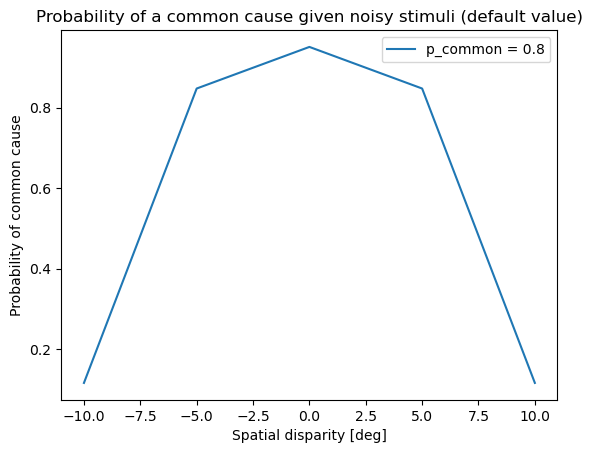

In [40]:
x_v_values = np.arange(-10, 10 + 1e-5, 5)  #locations extended from 10° to the left of the fixation point to 
#10° to the right of the fixation point at 5° intervals
x_a_values = np.zeros(5)
x_diff = x_v_values - x_a_values

P_C1_changeP = [P_C1_given_perception(x_v_values, x_a_values)]

for p in P_C1_changeP:
    plt.plot(x_diff, p, label=f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that with default values the probability of common cause assumed by participant is less likely then not assuming it (less 50%) for more than +/-7.5°.

### probability of a common cause given noisy stimuli vary P_common
That means we change the prior beliefe, i.e. the prior uncertainty (increase with higher sigma).


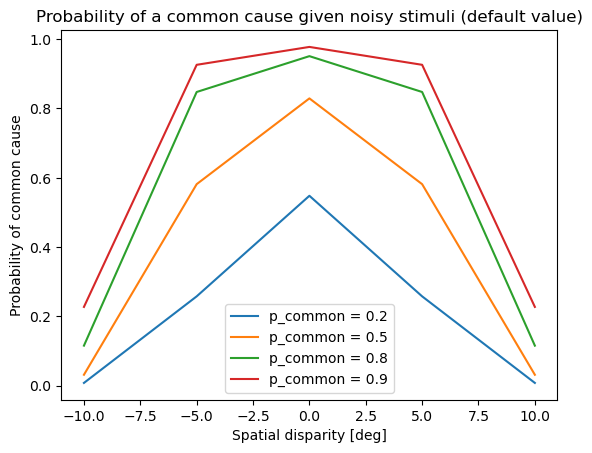

In [41]:
P_common_difference = [0.2, 0.5, 0.8, 0.9]
P_common_dict = {}
for p_common in P_common_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, p_common=p_common)
    P_common_dict[p_common] = P_C1_values

for p_common, p_values in P_common_dict.items():
    plt.plot(x_diff, p_values, label=f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_v
That means we make visual data different noisy (higher sigma = more noisy)


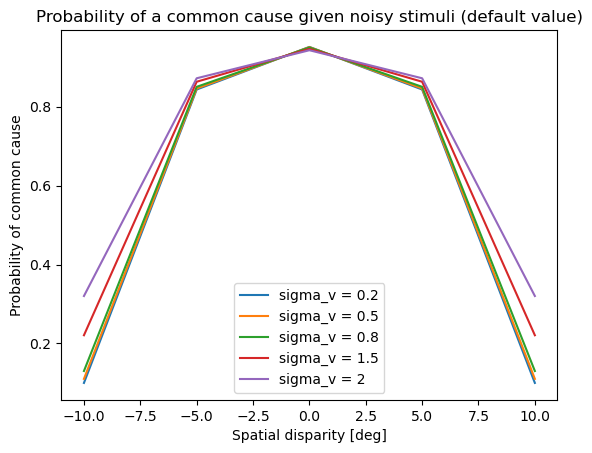

In [42]:
sigma_v_difference = [0.2, 0.5, 0.8, 1.5, 2]
sigma_v_dict = {}
for sigma_v in sigma_v_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_v=sigma_v)
    sigma_v_dict[sigma_v] = P_C1_values

for sigma_v, p_values in sigma_v_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_v = {sigma_v}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_a
That means we make the Auditory signal change in noise (higher sigma = more noisy).


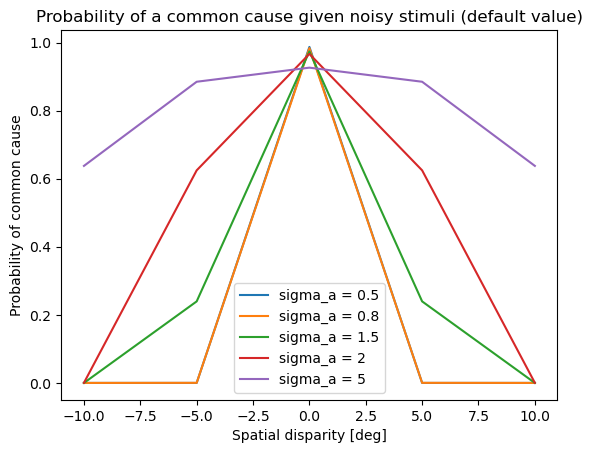

In [43]:
sigma_a_difference = [0.5, 0.8, 1.5, 2, 2, 5, 5]
sigma_a_dict = {}
for sigma_a in sigma_a_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_a=sigma_a)
    sigma_a_dict[sigma_a] = P_C1_values

for sigma_a, p_values in sigma_a_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_a = {sigma_a}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

Need more noise in audio to see a difference. 
But again higher noise increase probability of thinking its a common cause.

### probability of a common cause given noisy stimuli vary sigma_p

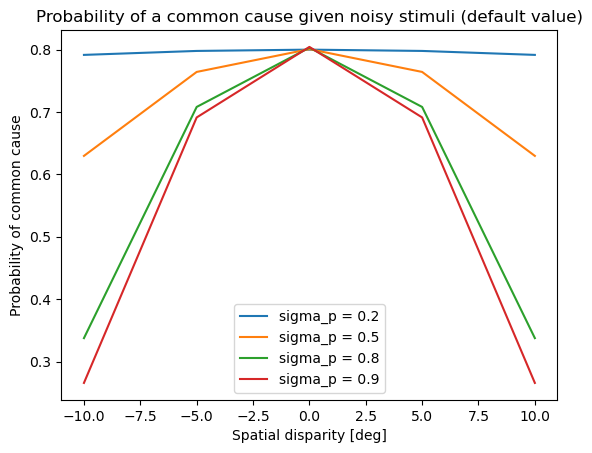

In [44]:
sigma_p_difference = [0.2, 0.5, 0.8, 0.9]
sigma_p_dict = {}
for sigma_p in sigma_p_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_p=sigma_p)
    sigma_p_dict[sigma_p] = P_C1_values

for sigma_p, p_values in sigma_p_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_p = {sigma_p}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that the probability of common cause is higher with higher sigma_p, i.e. more noise in the prior belief.

### Part (d) — Plot estimated stimulus positions ŝv and ŝa as a function of xv (assuming xa = 0)


In [45]:
# Part (d) — Plot estimated stimulus positions ŝv and ŝa as a function of xv (assuming xa = 0)

# Default parameters
p_common = 0.8
sigma_v = 0.6
sigma_a = 3.1
sigma_p = 15.0
mu_p = 0.0


def estimate_sv_sa(xv, xa, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15.0, mu_p=0.0):
    p_c1 = P_C1_given_perception(xv, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)  #eq.2

    # Estimate sv and sa using the equations provided eq.11
    sv_c2 = (xv / sigma_v ** 2 + mu_p / sigma_p ** 2) / (1 / sigma_v ** 2 + 1 / sigma_p ** 2)
    sa_c2 = (xa / sigma_a ** 2 + mu_p / sigma_p ** 2) / (1 / sigma_a ** 2 + 1 / sigma_p ** 2)

    # Common cause estimate eq.12
    s_common = (xv / sigma_v ** 2 + xa / sigma_a ** 2 + mu_p / sigma_p ** 2) / \
               (1 / sigma_v ** 2 + 1 / sigma_a ** 2 + 1 / sigma_p ** 2)

    sv_hat = p_c1 * s_common + (1 - p_c1) * sv_c2  #eq.9
    sa_hat = p_c1 * s_common + (1 - p_c1) * sa_c2  #eq.10
    return sv_hat, sa_hat


def plot_estimated_positions(xv_vals, xa=0.0, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15.0, mu_p=0.0):
    sv_hats, sa_hats = [], []
    for xv in xv_vals:
        sv_hat, sa_hat = estimate_sv_sa(xv, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)
        sv_hats.append(sv_hat)
        sa_hats.append(sa_hat)

    plt.figure()
    plt.plot(xv_vals, sv_hats, label="Estimated $\hat{s}_v$")
    plt.plot(xv_vals, sa_hats, label="Estimated $\hat{s}_a$")
    plt.plot(xv_vals, xv_vals, 'k--', label="Identity line")
    plt.xlabel("xv (Visual observation)")
    plt.ylabel("Estimated position")
    plt.title(
        f"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$ (with $x_a = 0$ , $p_{{common}}$={p_common}, $sigma_{{v}}$={sigma_v}, $sigma_{{a}}$={sigma_a}, $sigma_{{p}}$={sigma_p})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

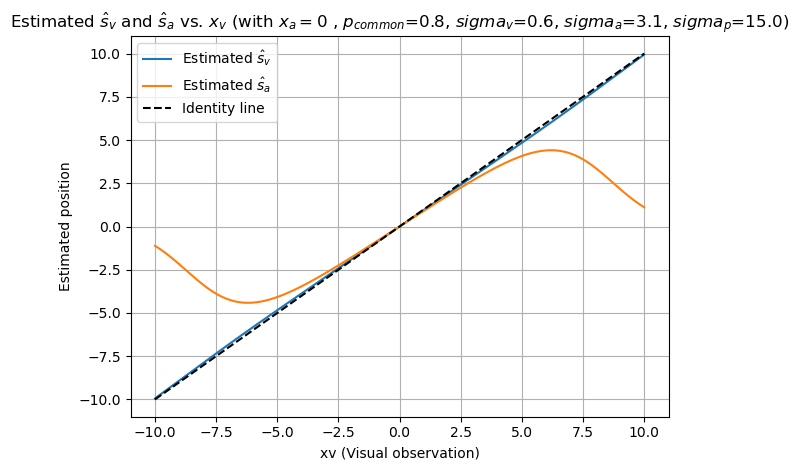

In [46]:
xv_vals = np.linspace(-10, 10, 200)

plot_estimated_positions(xv_vals, xa=0.0, p_common=p_common, sigma_v=sigma_v, sigma_a=sigma_a, sigma_p=sigma_p,
                         mu_p=mu_p)

from the plot we observed when xv is close to zero two stimulus integrate to a common cause, i.e. the estimated positions are close to each other.
When xv is far away from zero the estimated positions diverge, i.e. the visual and auditory stimulus are not integrated.At large disparities, the estimates diverge—reflecting segregation due to low posterior for a common cause.

### varying p_common, sigma_v, sigma_a, sigma_p

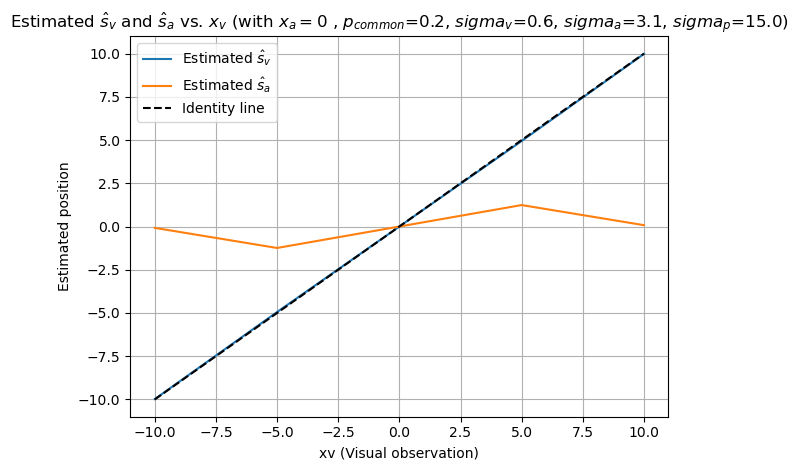

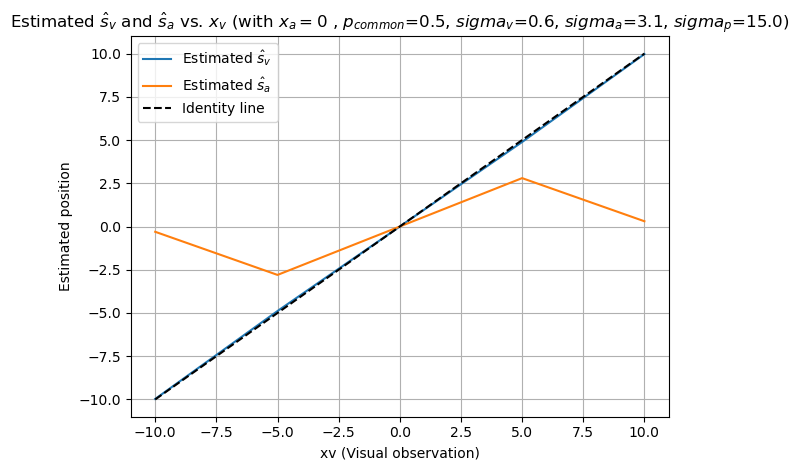

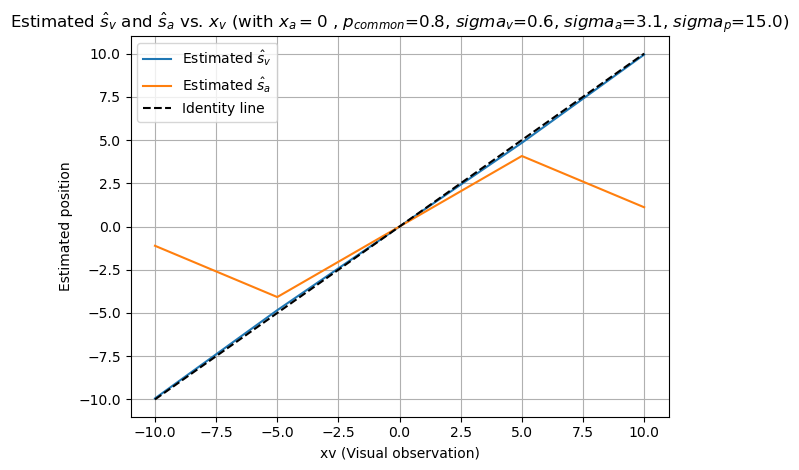

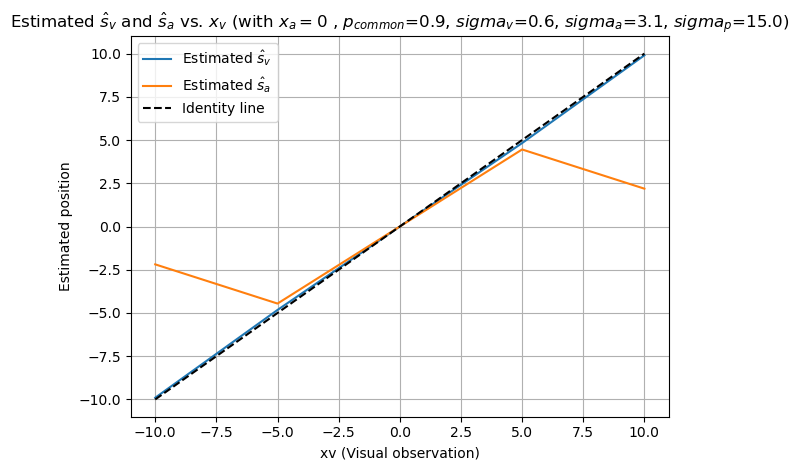

In [47]:
P_common_difference = [0.2, 0.5, 0.8, 0.9]
P_common_dict = {}
for p_common in P_common_difference:
    plot_estimated_positions(x_v_values, p_common=p_common)


In [48]:
def plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="p_common", param_values=None, **kwargs):
    """
    Plot estimated stimulus positions ŝv and ŝa for varying parameter values in a single diagram.
    
    Args:
        xv_vals: Array of visual observation values.
        xa: Fixed auditory observation value.
        param_name: Name of the parameter to vary (e.g., "p_common").
        param_values: List of values for the parameter to vary.
        kwargs: Other fixed parameters.
    """
    if param_values is None:
        default_params = {
        "p_common": 0.8,
        "sigma_v": 0.6,
        "sigma_a": 3.1,
        "sigma_p": 15.0,
        "mu_p": 0.0
    }
        param_values = [kwargs.get(param_name, default_params.get(param_name, 0.0))]  

    plt.figure(figsize=(10, 6))

    for param_value in param_values:
        kwargs[param_name] = param_value
        sv_hats, sa_hats = [], []
        for xv in xv_vals:
            sv_hat, sa_hat = estimate_sv_sa(xv, xa, **kwargs)
            sv_hats.append(sv_hat)
            sa_hats.append(sa_hat)

        plt.plot(xv_vals, sv_hats, label=f"$\hat{{s}}_v$ ({param_name}={param_value})")
        plt.plot(xv_vals, sa_hats, label=f"$\hat{{s}}_a$ ({param_name}={param_value})")

    plt.plot(xv_vals, xv_vals, 'k--', label="Identity line")
    plt.xlabel("xv (Visual observation)")
    plt.ylabel("Estimated position")
    plt.title(f"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$ (varying {param_name})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

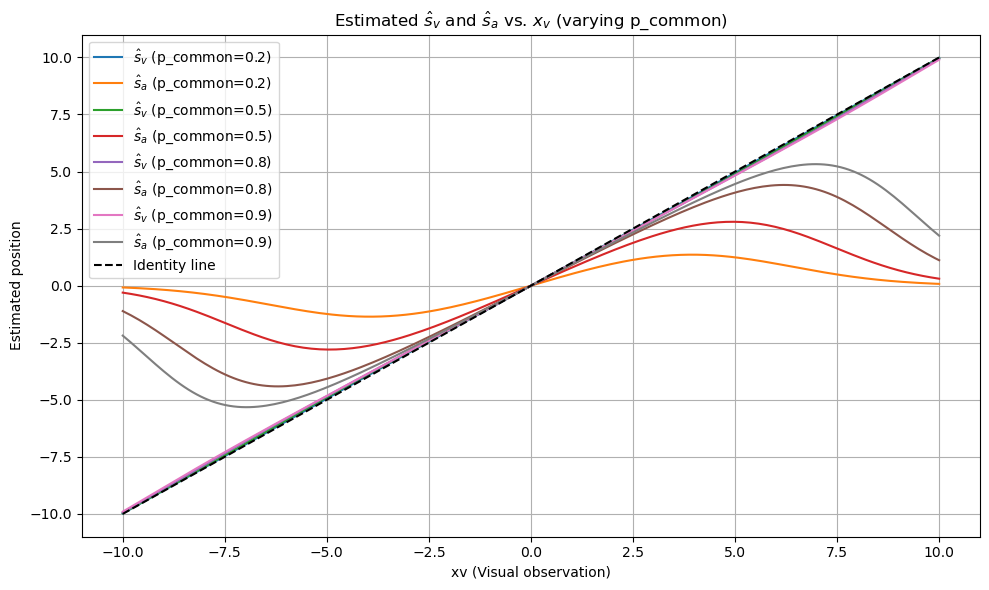

In [49]:
xv_vals = np.linspace(-10, 10, 200)
p_common_values = [0.2, 0.5, 0.8, 0.9]

plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="p_common", param_values=p_common_values, sigma_v=0.6,
                                  sigma_a=3.1, sigma_p=15.0, mu_p=0.0)

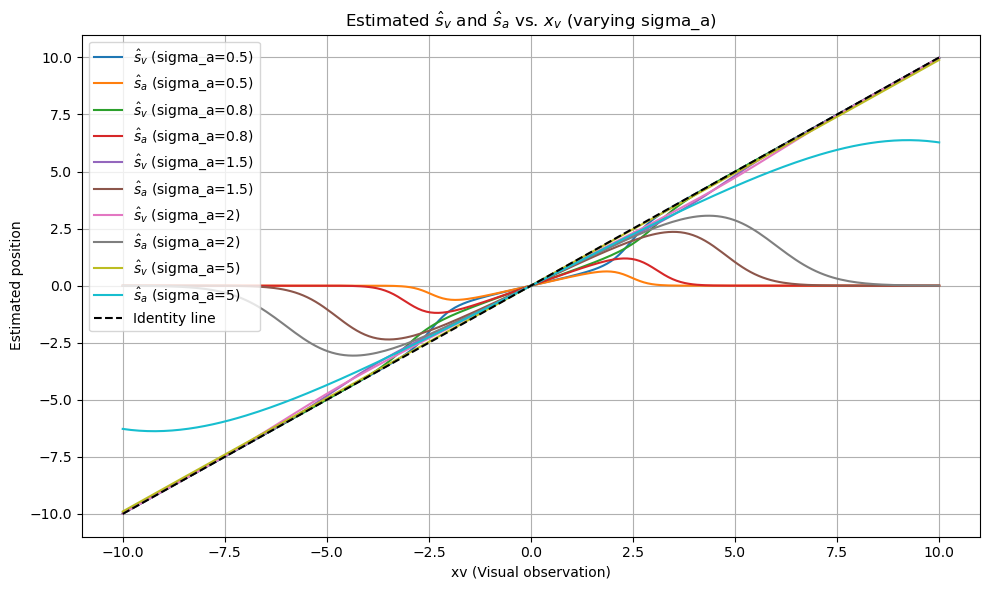

In [50]:
xv_vals = np.linspace(-10, 10, 200)

# Varying sigma_a
sigma_a_values = [0.5, 0.8, 1.5, 2, 5]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_a", param_values=sigma_a_values, sigma_v=0.6,
                                  sigma_p=15.0, mu_p=0.0)


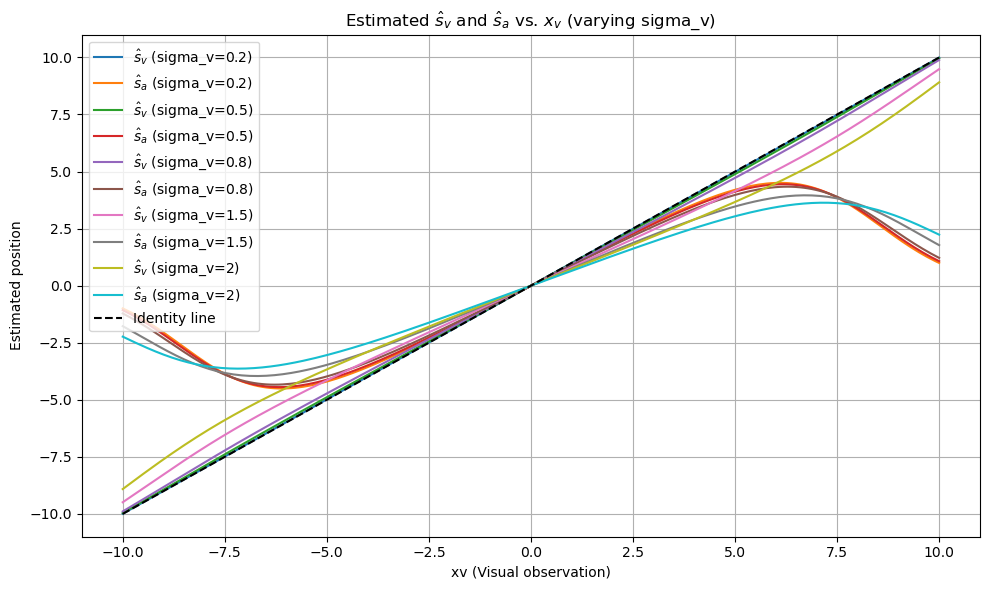

In [51]:
# Varying sigma_v
sigma_v_values = [0.2, 0.5, 0.8, 1.5, 2]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_v", param_values=sigma_v_values, sigma_a=3.1,
                                  sigma_p=15.0, mu_p=0.0)


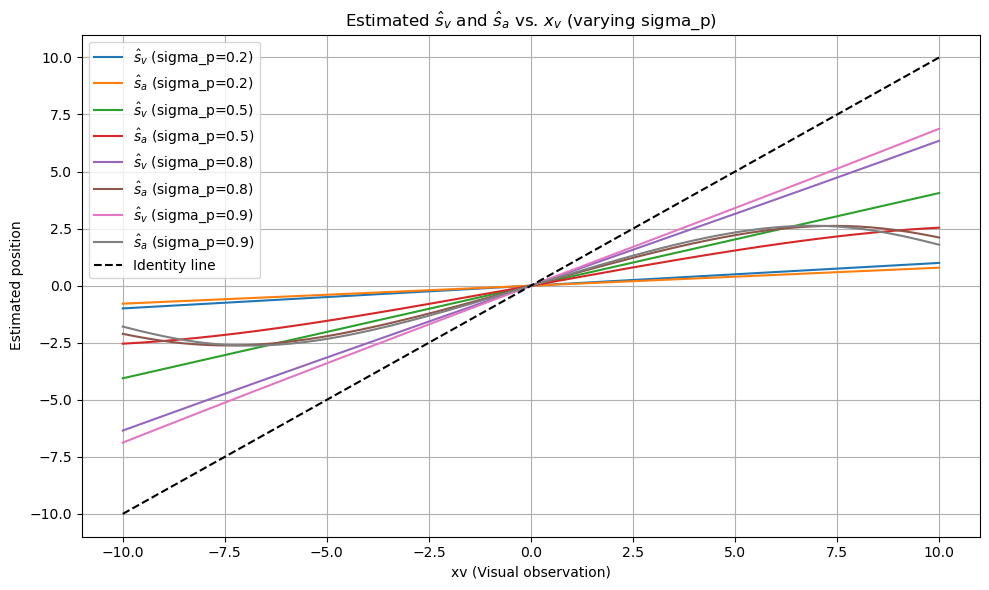

In [52]:
# Varying sigma_p
sigma_p_values = [0.2, 0.5, 0.8, 0.9]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_p", param_values=sigma_p_values, sigma_v=0.6,
                                  sigma_a=3.1, mu_p=0.0)